## Exercises and supplementary notes - Week 4, Session AM1

We'll be using the same tools that we used last week for this session.

- [pandas](pandas.pydata.org) for data handling (our dataframe library)
- [seaborn](seaborn.pydata.org) for _nice_ data visualization

Shortly we'll also by trying out:

- [scikit-learn](scikit-learn.org) an extensive machine learning library.
- [numpy](numpy.org) - a fundamental maths library best used by people with a strong maths background.  We won't explore it much today, but it does have some useful methods that we'll need.  It underlies all other mathematical and plotting tools that we use in Python.

We'll be using scikit-learn over the next few weeks, and it's well worth reading the documentation and high level descriptions.

As before, the aim is to get familiar with code-sharing workflows - so we will be doing pair programming for the duration of the day! _You will probably want to take a moment to look at the documentation of the libraries above - especially pandas_

The other useful resource is Stack Overflow - if you have a question that sounds like 'how do I do {x}' then someone will probably have answered it on SO. Questions are also tagged by library so if you have a particular pandas question you can do something like going to https://stackoverflow.com/questions/tagged/pandas (just replace the 'pandas' in the URL with whatever library you're trying to use.

Generally answers on SO are probably a lot closer to getting you up and running than the documentation. Once you get used to the library then the documentation is generally a quicker reference. We will cover strategies for getting help in class.

Topics that we'll be discussing in this session include:
Robust Regression - http://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors

Non-gaussian error


## Git links

We will be working through using GitHub and GitKraken to share code between pairs. We will go through all the workflow in detail in class but here are some useful links for reference:

- GitKraken interface basics: https://support.gitkraken.com/start-here/interface
- Staging and committing (save current state -> local history): https://support.gitkraken.com/working-with-commits/commits
- Pushing and pulling (sync local history <-> GitHub history): https://support.gitkraken.com/working-with-repositories/pushing-and-pulling
- Forking and pull requests (request to sync your GitHub history <-> someone else's history - requires a _review_):
  - https://help.github.com/articles/about-forks/
  - https://help.github.com/articles/creating-a-pull-request-from-a-fork/

## Exercise: Robust Regression

Last week we used Scikit-Learn and Seaborn to do least-squares linear regression.  This is the same kind of linear regression that you've applied countless times in Excel.  We reframed it in the context of machine learning by creating a target array with labels, a features matrix, and then we used the fit method to train the model and the predict method to try to predict labels on new observations.  

As was highlighted by Oscar last week, the common linear regression approach aims to find a line that minimised the squared error between the predictions that result from that line and the observed labels in the target array.  The statistical consequences of this were discussed.  These included that the distribution of the errors that we see in our observed features is gaussian, also known as the normal distribution or the bell curve.

When the errors are not gaussian we saw that this distorted the linear fit that we found, and made it a poorer predictor than it would have been in the gaussian case.  We ran through an example where we created perfect linear data and then added gaussian noise.  We used Seaborn to do a linear fit and show us the residuals.  In this case we saw residuals that looked scattered in a way that was consistent with gaussian error and that indicated a good fit.

We then repeated this exercise, but this time we added a gamma error to the line.  In this case the residuals looked notably non-gaussian, as the errors were dominated by positive errors.

As the gamma distribution only provides positive errors, this leads to the question of why there were any negative errors in the residuals at all?  If the underlying process that we were trying to learn through the noise was correctly characterised by linear least squares then this would have been the case, but because least-squares error can't properly account for non-gaussian error the linear model was wrongly fitted.

Distorted linear models are a general consequence of non-gaussian errors in least squares linear regression.  In this exercise we're going to look at the impact of outliers on linear models, and we're going to try different methods of linear regression that use other measures of line error that are less sensitive to this.

We're going to use some pre-written methods that I've provided in the file week4_help.py, which you should find in the same directory as this notebook.  You'll need to import them.  Please review how we import methods from modules that we've written ourselves.  We did this in week two, so please review your notes from week two if you need to.

Import metal_sulphur_recovery_with_outliers.  Then use:

```metal_sulphur_recovery_with_outliers?```

to read the docstring.

We'll use this to create Pandas dataframes with varying numbers of outliers present.

In [1]:
from week4_help import recovery_sulphur_dataframe_with_outliers

In [2]:
recovery_sulphur_dataframe_with_outliers?

In [3]:
recovery = recovery_sulphur_dataframe_with_outliers(0)

In [4]:
recovery.head()

,metal_recovery_percent,feed_sulphur_percent
0,46.619407,0.241570
1,68.538719,1.085903
2,64.737393,0.676091
3,68.121452,1.018158
4,69.664892,1.323587


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

[(0, 100),
 Text(0, 0.5, 'recovery %'),
 (0, 1.5),
 Text(0.5, 0, 'feed sulphur %'),
 Text(0.5, 1.0, '% metal recovery vs % sulphur in feed')]

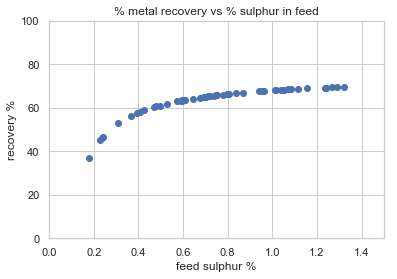

In [6]:
ax = plt.axes()
ax.plot(recovery['feed_sulphur_percent'], recovery['metal_recovery_percent'], 'o')
ax.set(xlim=(0, 1.5), ylim=(0, 100), xlabel='feed sulphur %', ylabel='recovery %',
      title='% metal recovery vs % sulphur in feed')

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


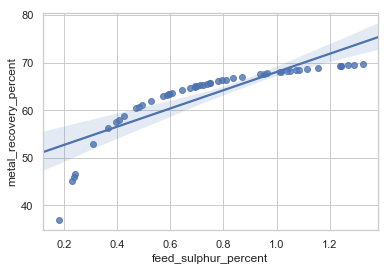

In [7]:
sns.regplot('feed_sulphur_percent', 'metal_recovery_percent', recovery)

Note the confidence intervals!  Confidence intervals are not very meaningful when you data doesn't conform with the assumptions of least-squares linear regression.  In this form the data is not linear, and so the errors are not gaussian.

Let's transform the data to make it more linear.  We can use the transform pipeline when using scikit-learn, but it's not available when using seaborn, so we'll do it in the more basic way that we used last week.

In [8]:
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']

[(0, 100),
 Text(0, 0.5, 'recovery %'),
 (0.6, 5),
 Text(0.5, 0, '1/feed sulphur %'),
 Text(0.5, 1.0, '% metal recovery vs % sulphur in feed')]

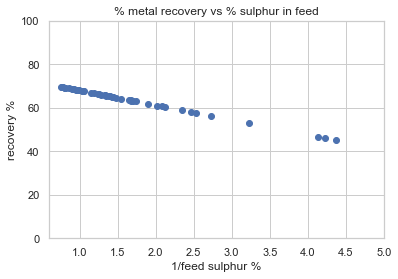

In [9]:
ax = plt.axes()
ax.plot(recovery['reciprocal_feed_sulphur'], recovery['metal_recovery_percent'], 'o')
ax.set(xlim=(0.6, 5), ylim=(0, 100), xlabel='1/feed sulphur %', ylabel='recovery %',
      title='% metal recovery vs % sulphur in feed')

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


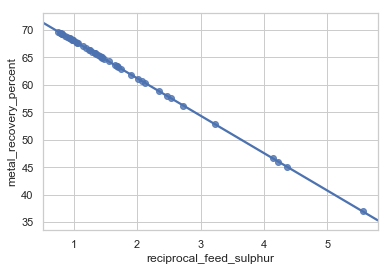

In [10]:
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery)

In [11]:
recovery = recovery_sulphur_dataframe_with_outliers(0.2)

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


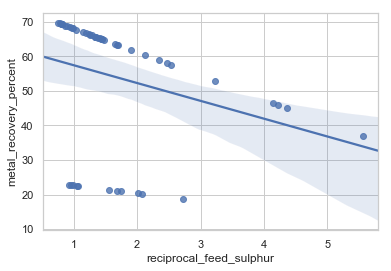

In [12]:
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery)

In [13]:
sns.regplot?

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: divide by zero encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: invalid value encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\robust\norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages

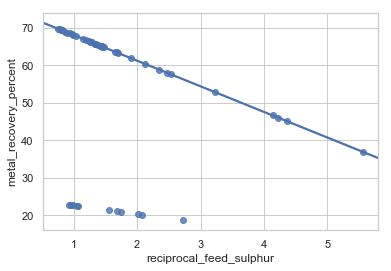

In [14]:
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery, robust=True)

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


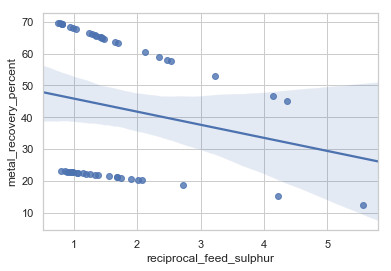

In [15]:
recovery = recovery_sulphur_dataframe_with_outliers(0.5)
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery, robust=False)

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


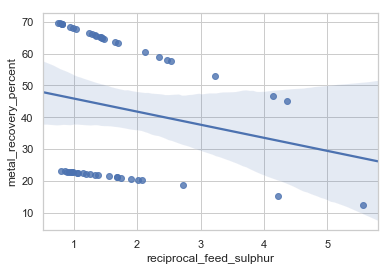

In [16]:
recovery = recovery_sulphur_dataframe_with_outliers(0.5)
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery, robust=True)

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


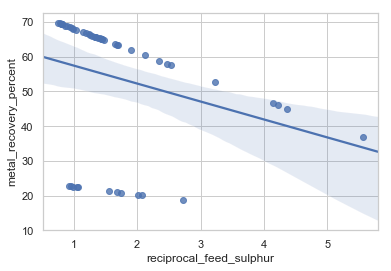

In [17]:
recovery = recovery_sulphur_dataframe_with_outliers(0.2)
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery, robust=False)

C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: divide by zero encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\robust\robust_linear_model.py:278: RuntimeWarning: invalid value encountered in true_divide
  self.weights = self.M.weights(wls_results.resid/self.scale)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\statsmodels\robust\norms.py:190: RuntimeWarning: invalid value encountered in less_equal
  return np.less_equal(np.fabs(z), self.t)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tdavies\AppData\Local\conda\conda\envs\CORE_Week_01\lib\site-packages

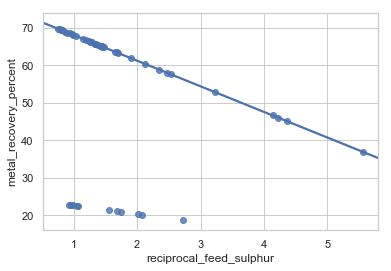

In [18]:
recovery = recovery_sulphur_dataframe_with_outliers(0.2)
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
sns.regplot('reciprocal_feed_sulphur', 'metal_recovery_percent', recovery, robust=True)

Now let's try this using scikit-learn, and we'll also look at the behaviour of the broader range of robust linear regression methods available here as we vary the amount of outliers present.

Remember the sequence of steps for using scikit-learn for linear regression:

### Refresher from week 3: The Estimator API of scikit-learn

There are a few steps to follow when using the estimator API.  These steps are the same for all methods that scikit-learn implements, not just for linear regression.

1. Choose a class of model by importing the appropriate estimator class.  In our case we want to import Linear Regression.  Here's how we can do it.

First import LinearRegression from scikit-learn.  Use this code:

```from sklearn.linear_model import LinearRegression```

Now create an "instance" of the LinearRegression class.  We can do it like this:

```model = LinearRegression(fit_intercept=True)```

To check that this has worked look at the model object after it's created.  It should tell you about some of its settings.

```model```

2. Next we need to arrange a pandas dataframe into a features matrix and a target vector.

The notation is a bit strange!  The two pairs of "[ ]" as "[[ ]]" that you will see for the features matrix is correct.

3. Fit the model to your data by using the fit() method of the LinearRegression object.

Again, look at the documentation for how to apply this.  You'll need to provide your features matrix (X) and target vector (y) as parameters to the fit method.

```model.fit(X, y)```

As this is a two dimensional linear model, it has two parameters.  The line's intercept and slope.  The notation that scikit-learn uses is a little unfriendly.  Its convention is to add underscores to the names of the parameters it finds.  Also, it calls the slope "coef".

After fitting the model, find the coefficients with ```model.coef_``` and ```model._intercept_```.

#### Now that we've trained a model, we should make predictions!

6. Make predictions!

This is also more complicated with scikit-learn than it is with Seaborn.

For a given, single value for a feature (ie a meal cost) we can predict a label.  For example, for a meal cost of $20, we could make a prediction with:

```predicted_tip = model.predict(20)```

But to find the smooth line that seaborn finds we need to explicitly tell scikit-learn that we want to do a prediction for all of the meal costs that we're interested in.  To do this we
use a new library called "numpy" and a method called linspace (which is short for linear spacing).

First we need to import numpy.

```import numpy as np```

While I used predicted_tip above as an example of a predicted target array, and 20 is an example of x, I'll now switch to the usual y and x conventions used in tutorials with scikit-learn.  You can of course use any variables names you, and in your own code it's best to use descriptive names that mean something in the domain of your industry, like 'predicted_tip", or "octane_rating".

We need to use the linspace method in numpy.  Use it like this:

```xfit = np.linspace(0, 60)```

This will create a collection of meal costs, in order, starting from 0 dollars up to 60 dollars.  This is what we need, but this collection isn't formatted correctly for scikit-learn.  To make it work with scikit-learn we next have to adjust the format with this instruction:

```xfit_reshaped = xfit[:, np.newaxis]
yfit = model.predict(xfit_reshaped).```

yfit now contains our predicted tips.  Type ```yfit``` to see them numerically, or plot them.

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
features_matrix = recovery[['reciprocal_feed_sulphur']]
target_array = recovery['metal_recovery_percent']
model.fit(features_matrix, target_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
model.coef_

array([-5.15091923])

In [21]:
model.intercept_

62.57978073849143

scikit-learn is able to provide an R^2 value.  If more comprehensive numerical statistics are wanted then statsmodel should be used.  Which we'll try out shortly.

Use
```model.score```

In [22]:
model.score(features_matrix, target_array)

0.0815794059186975

In [23]:
import numpy as np
fitted_sulphur_x = recovery['reciprocal_feed_sulphur']

In [24]:
fitted_sulphur_x = fitted_sulphur_x[:, np.newaxis]

In [25]:
recovery['fitted_ls_recovery'] = model.predict(fitted_sulphur_x)

In [26]:
recovery.head()

,metal_recovery_percent,feed_sulphur_percent,reciprocal_feed_sulphur,fitted_ls_recovery
0,46.619407,0.241570,4.139588,41.257098
1,22.846240,1.085903,0.920893,57.836336
2,64.737393,0.676091,1.479091,54.961104
3,22.707151,1.018158,0.982166,57.520725
4,69.664892,1.323587,0.755522,58.688146


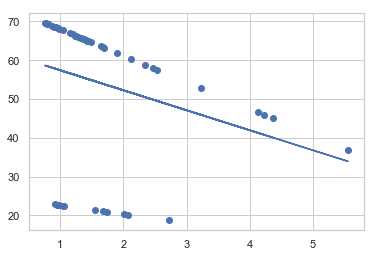

In [27]:
plt.scatter(recovery['reciprocal_feed_sulphur'], recovery['metal_recovery_percent'])
plt.plot(recovery['reciprocal_feed_sulphur'], recovery['fitted_ls_recovery'])

That is pretty much the same fit that we got from Seaborn, when we chose to use least squares linear fitting.  Let's try out the robust estimators that scikit-learn provides:

Our options include:

Theil-Sen:  While least-squares fitting finds a line that best represents the mean average of the points (as you may recall from Oscar's presentation last week), Theil-Sen is built upon using the median average instead.  The median, which comes about by ordering all of the elements and choosing the element in the middle, is less sensitive to outliers than the mean is.  Theil-Sen is the best of the available estimators when there are outliers in the x direction.  The breakdown point is 29.3%

RANSAC (Random Sample Consensus):  This creates lots of linear models from random subsets of the original data (which may or may not include the outliers).  It then applies the model to all of the data and looks at the residuals to choose outliers (where an outlier is an observation that has residual greater than some threshold).  It does this for all of the models it creates, and chooses the model with the most inliers.  This is the best of the available estimators for outliers in the y direction, which is the normal situation.

Huber Regressor:  This regressor tends to be faster than both RANSAC and Theil-Sen, but often gives poorer results.

Note:  All of these are suitable only for low-dimensional problems, they won't work properly once we go past a few dimensions (and they're best applied with just two dimensions).

Import these in the same way that you import LinearRegression:


```from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor```


In [28]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor

Exercise:  Try the other robust regressors, and compare their breakdown points in this case.  Use trial an error with these regressors when you apply them to your own problems.



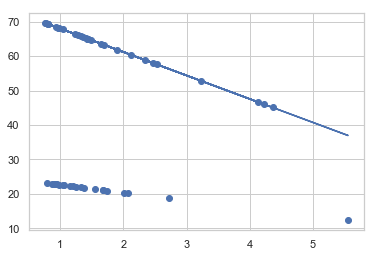

In [143]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor
recovery = recovery_sulphur_dataframe_with_outliers(0.45)
recovery['reciprocal_feed_sulphur'] = 1/recovery['feed_sulphur_percent']
fitted_sulphur_x = recovery['reciprocal_feed_sulphur']
fitted_sulphur_x = fitted_sulphur_x[:, np.newaxis]

#model = LinearRegression(fit_intercept=True)
model = TheilSenRegressor(fit_intercept=True)
#model = RANSACRegressor()
#model = HuberRegressor(fit_intercept=True)

features_matrix = recovery[['reciprocal_feed_sulphur']]
target_array = recovery['metal_recovery_percent']
model.fit(features_matrix, target_array)

import numpy as np
recovery['fitted_ls_recovery'] = model.predict(fitted_sulphur_x)

plt.scatter(recovery['reciprocal_feed_sulphur'], recovery['metal_recovery_percent'])
plt.plot(recovery['reciprocal_feed_sulphur'], recovery['fitted_ls_recovery'])

### Exercise:  Template Regression.

In multichannel instrumentation, such as XRD and spectroscopy it's common to have hundred or even thousands of spectral channels.  Often there is prior understanding that means that we know how pure examples of various components would look like in the instrument.  It's also the case that the behaviour of the samples and the instrument is well-approximated as a linear system.  That is, one where the whole is the sum of the known parts.  The problem then is to find out how much of each known part is present in an observation.

In this example we've created templates for three minerals of interest - quartz, dilithium, red kryptonite and unobtainium.  We also have drill hole data containing observations from 100 samples of these components.  Pick sample 34 and lets use template regression to estimate how much quartz, dilithium, kryptonite and unobtainium are present.

1. First use the template_helper module to create the templates for these four phases.
2. Plot and observe the templates.  Are there overlaps?
3. Create a set of observations, based on these templates and synthetic compositions
4. Is there any background here?  Do you have backgrounds in your data that you need to remove?  If so, discuss how you might do this, at a conceptual level.
5. Linear least-squares fit a solution.
6. Don't forget to observe the residuals. Is there a non-gaussian structure in the residuals?
7. Compare the predicted labels against the known labels.  How did it go?

In [29]:
from week4_help import create_templates_matrix

In [30]:
from week4_help import MultichannelXAxis

In [31]:
x_axis = MultichannelXAxis(5, 90, 0.2)

In [32]:
templates_matrix = np.zeros((x_axis.channel_count, 5))

In [33]:
templates_matrix.shape

(426, 5)

In [34]:
x_axis.as_vector.shape

(426,)

In [35]:
from week4_help import _apply_convolution_kernals

In [36]:
a_reflection = _apply_convolution_kernals(x_axis.as_vector, 10, 25, 4, 3)

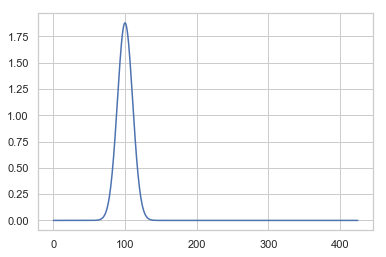

In [37]:
plt.plot(a_reflection)

In [38]:
from collections import namedtuple
quartz_reflections = []
Reflection = namedtuple('Reflection', ('intensity', 'two_theta', 'broadening'))
first = Reflection(intensity = 10.0, two_theta = 25.0, broadening= 3.0)
quartz_reflections.append (first)
quartz_reflections.append (Reflection(13.0, 38.0, 6.0))
quartz_reflections.append (Reflection(10.0, 43.0, 12.0))
quartz_reflections.append (Reflection(25.0, 12.0, 2.0))

In [39]:
first_reflection_of_quartz = _apply_convolution_kernals(x_axis.as_vector, first.intensity, 
                                                        first.two_theta, 4, first.broadening)

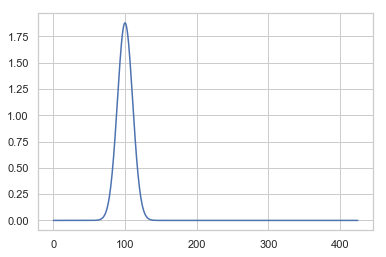

In [40]:
plt.plot(first_reflection_of_quartz)

In [41]:
templates_matrix[:, 0] += first_reflection_of_quartz

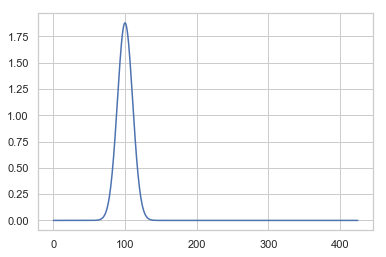

In [42]:
plt.plot(templates_matrix[:, 0])

In [43]:
second = quartz_reflections[1]

In [44]:
second_reflection_of_quartz = _apply_convolution_kernals(x_axis.as_vector, second.intensity, 
                                                        second.two_theta, 4, second.broadening)

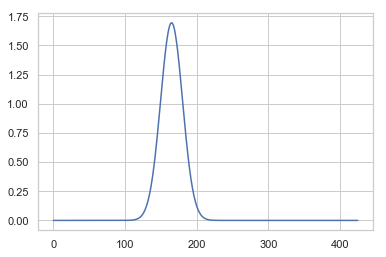

In [45]:
plt.plot(second_reflection_of_quartz)

In [46]:
templates_matrix[:, 0] += second_reflection_of_quartz

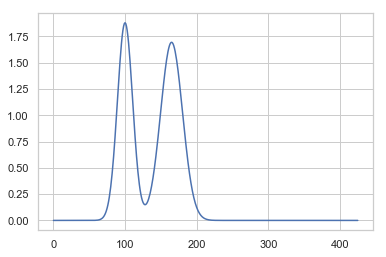

In [47]:
plt.plot(templates_matrix[:, 0])

In [48]:
from week4_help import create_templates_matrix

In [49]:
templates = create_templates_matrix()

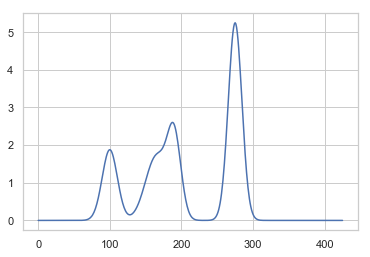

In [50]:
# quartz
plt.plot(templates[:, 0])

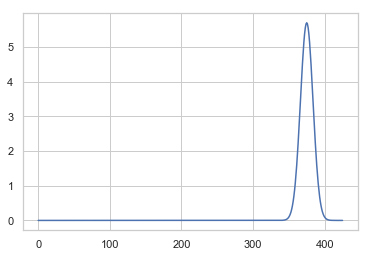

In [51]:
# dilithium
plt.plot(templates[:, 1])

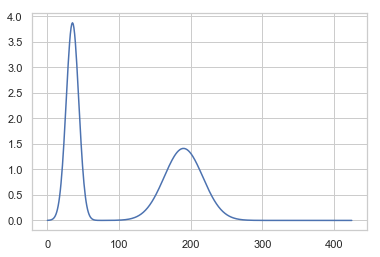

In [52]:
# kryptonite
plt.plot(templates[:, 2])

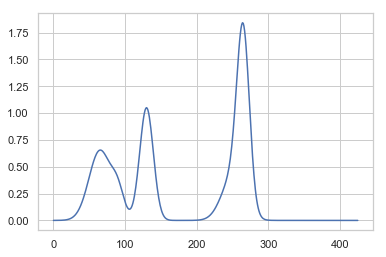

In [53]:
# unobtainium
plt.plot(templates[:, 3])

In [54]:
from week4_help import create_composition_dataframe

In [55]:
compositions_dataframe = create_composition_dataframe(50)

In [56]:
compositions_dataframe.head()

,Quartz,Dilithium,Kryptonite,Unobtainium
0,5.000000,33.734294,20.051871,5.399245
1,5.000000,34.685407,22.509373,0.145264
2,5.000000,33.691945,22.478866,4.435538
3,32.249339,5.000000,20.669148,5.241627
4,29.202036,27.327283,20.710555,3.489549


In [57]:
from week4_help import create_observations

In [58]:
import pandas as pd
observations = pd.DataFrame()

In [59]:
observations_count = len(compositions_dataframe)

In [60]:
channels_count = len(templates[:,0])

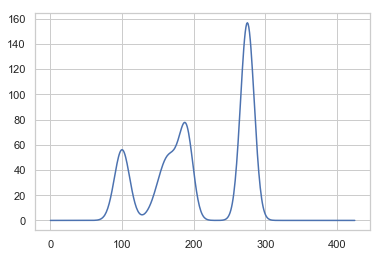

In [61]:
plt.plot(templates[:,0]*compositions_dataframe['Quartz'][5])

In [62]:
observation = templates[:,0]*compositions_dataframe['Quartz'][5]

In [63]:
observation

array([3.04077980e-18, 7.35151253e-18, 1.76163228e-17, 4.18408643e-17,
       9.84992351e-17, 2.29832739e-16, 5.31542198e-16, 1.21845761e-15,
       2.76840688e-15, 6.23442257e-15, 1.39158381e-14, 3.07871382e-14,
       6.75112409e-14, 1.46733635e-13, 3.16104066e-13, 6.74958861e-13,
       1.42847072e-12, 2.99648561e-12, 6.23016959e-12, 1.28390934e-11,
       2.62250100e-11, 5.30937967e-11, 1.06541479e-10, 2.11904644e-10,
       4.17742868e-10, 8.16252324e-10, 1.58083533e-09, 3.03455947e-09,
       5.77366375e-09, 1.08881511e-08, 2.03518366e-08, 3.77050820e-08,
       6.92377569e-08, 1.26018094e-07, 2.27336745e-07, 4.06493107e-07,
       7.20416331e-07, 1.26549586e-06, 2.20335627e-06, 3.80238019e-06,
       6.50388970e-06, 1.10264982e-05, 1.85288674e-05, 3.08607836e-05,
       5.09462055e-05, 8.33611221e-05, 1.35195451e-04, 2.17323864e-04,
       3.46257809e-04, 5.46812646e-04, 8.55902589e-04, 1.32787424e-03,
       2.04190893e-03, 3.11216494e-03, 4.70149156e-03, 7.03972236e-03,
      

In [64]:
observations_matrix = np.zeros((channels_count, observations_count))

In [65]:
observations_matrix[:, 5]= templates[:,0]*compositions_dataframe['Quartz'][5]

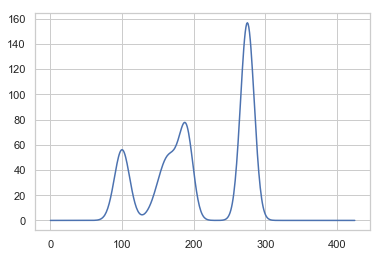

In [66]:
plt.plot(observations_matrix[:, 5])

Now use create_observations and create_composition_dataframe to set up a linear least problem.  Solve it, for a particular observation, using scikit_learn and the estimator API.

In [67]:
observations_matrix = create_observations(compositions_dataframe, templates)

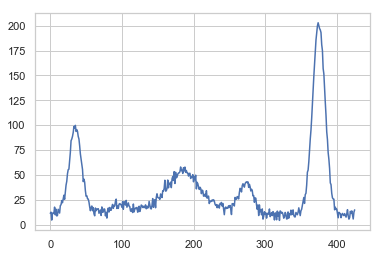

In [68]:
plt.plot(observations_matrix[:,2])

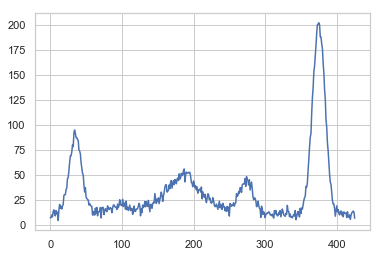

In [69]:
plt.plot(observations_matrix[:,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
model.coef_

array([-5.15091923])

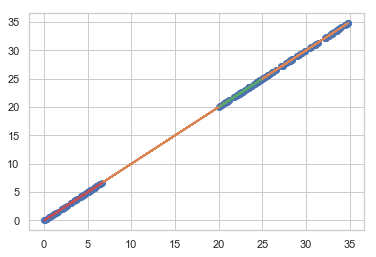

In [164]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor

from week4_help import create_composition_dataframe

model = LinearRegression(fit_intercept=True)
#model = TheilSenRegressor(fit_intercept=True)
#model = RANSACRegressor()
#model = HuberRegressor(fit_intercept=True)

features_matrix = create_composition_dataframe(50)
target_array = features_matrix[:51]
model.fit(features_matrix, target_array)

import numpy as np
features_matrix[:51] = model.predict(target_array)

plt.scatter(features_matrix[:51], features_matrix[:50])
plt.plot(features_matrix[:50], features_matrix[:51])

In [166]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

features_matrix = templates
target_array = observations_matrix[:,0]
model.fit(features_matrix, target_array)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [167]:
model.coef_


array([ 5.19359182, 33.40456138, 19.9227146 ,  4.63472956,  0.        ])